**Mounting colab notebook to Drive**

In [1]:
# Mounting colab notebook to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Julia installation (run once)**

In [2]:
# Julia installation
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

*Installing PySR and relevant packages*

In [3]:
# Installing PySR (and relevant packages)
!pip install pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 kB 4.5 MB/s eta 0:00:00


*Importing relevant modules*

In [4]:
#Importing relevant modules
import os
import time
import matplotlib as plt
import pandas as pd
import numpy as np
# from pysr import pysr, best

#Configuring matplotlib
%matplotlib inline
plt.style.use('seaborn-whitegrid')

<ipython-input-4-48e466cdd8dd>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


*Verifying working directory and data file name*

In [5]:
input_path = '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/benchmark/'
os.chdir(input_path)
!pwd
data_path = '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/benchmark/tegmark_data/'
data_file = 'I_44_4.txt'

/content/drive/My Drive/Symbolic-Regressor/Feynman Local/benchmark


*Obtaining data from text file, plotting selected variables (optional) and running symbolic regression with time measurements*

In [6]:
#Converting raw data in .txt file to lists compatible with PySR
os.chdir(data_path)
x_values = []
y_values = []
with open(data_file, 'r+') as f:
    for row in f:
        x_values.append([float(x) for x in row.split()])

for arr in x_values:
    y_values.append(arr[-1])
    del arr[-1]

x_values_pysr = np.array(x_values)
y_values_pysr = np.array(y_values)

               0         1         2         3         4          5   6
0       4.420473  3.845858  1.946024  3.630354  3.764595   1.201266 NaN
1       4.670882  2.583822  2.037491  3.855706  1.721105 -19.833936 NaN
2       1.018218  1.394887  3.364167  2.419376  4.496201   2.961114 NaN
3       2.178751  1.996822  1.683915  2.897501  2.097522  -2.366973 NaN
4       4.579357  3.164652  1.527565  3.944949  3.332458  -3.735183 NaN
...          ...       ...       ...       ...       ...        ...  ..
999995  1.466153  2.161625  4.107673  4.527683  3.033230  -5.214916 NaN
999996  4.815990  3.148356  1.204335  3.620051  2.669649  -5.561126 NaN
999997  4.326886  3.278747  2.973634  2.550455  4.364763  22.666346 NaN
999998  4.045640  4.696793  3.229463  2.930220  4.467938  25.886696 NaN
999999  4.371847  4.628816  3.303221  2.972516  1.828456 -32.482709 NaN

[1000000 rows x 7 columns]


<Axes: xlabel='1', ylabel='2'>

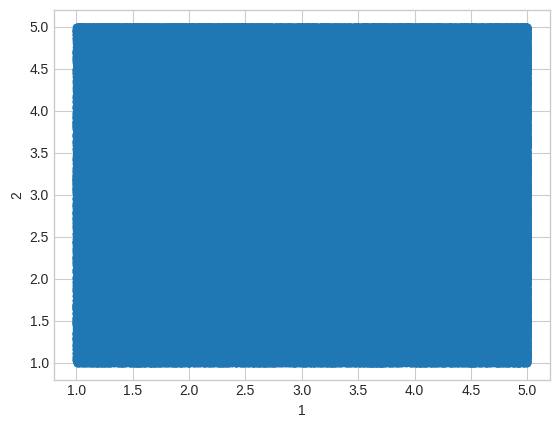

In [7]:
# Printing out generated data with Pandas and plotting it with matplotlib (optional)
os.chdir(data_path)
df=pd.read_csv(data_path + data_file,sep=" ",header=None)
print(df)

# Manually edit and run upon printing data and noting number of 'x' and 'y' variables. Aids in detection of potential noise
# df.plot.scatter(x=0, y=1)
df.plot.scatter(x=1, y=2)

In [ ]:
# Running PySR symbolic regression on data with time measurements. Default settings (operators, iterations etc used)
# https://github.com/MilesCranmer/PySR/blob/master/docs/operators.md
os.chdir(input_path)
start_time = time.time()
equations = pysr(
    x_values_pysr,
    y_values_pysr,
    niterations=5,
)

...# (you can use ctl-c to exit early)

print(best(equations))
print(time.time() - start_time)

In [ ]:
#Bruh
while True:pass